# Part 1: Comparison of Incomes between USA , China, Korea and Japan represented with a bar plot


# Part 2: Analyzing the mean income density comparison between USA and JAPAN

In [2]:
#importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from matplotlib.patches import Polygon
#from fitter import Fitter (Hope Kaggle will load this package)

In [3]:
df = pd.read_csv('data/timesData.csv')
#USA data is selected for comaprison with East Asian countries like Japan,
#Korea and China
mask_us = df.country =='United States of America' 
mask_cn = df.country =='China'
mask_jp = df.country == 'Japan'
mask_sk = df.country == 'South Korea'
US = df[mask_us]
CN = df[mask_cn]
JP = df[mask_jp]
SK = df[mask_sk]
#ignoring universities that do not have income fied.
USI=US.income.convert_objects(convert_numeric=True).dropna()
CNI=CN.income.convert_objects(convert_numeric=True).dropna()
JPI=JP.income.convert_objects(convert_numeric=True).dropna()
SKI=SK.income.convert_objects(convert_numeric=True).dropna()

C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


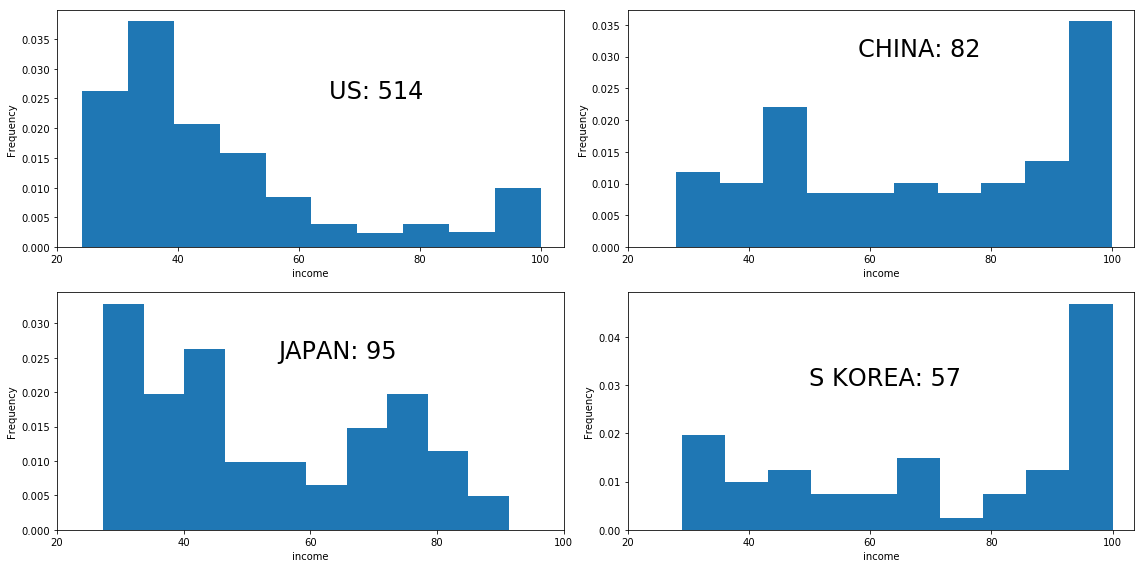

In [4]:
#compare the dataset
ax=plt.subplot(2,2,1)
USI.plot(kind='hist',normed=True,figsize=(16,8))
num=len(USI)
plt.text(65, 0.025, 'US: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,2)
CNI.plot(kind='hist',normed=True)
num=len(CNI)
plt.text(58, 0.03, 'CHINA: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,3)
JPI.plot(kind='hist',normed=True)
num=len(JPI)
plt.text(55, 0.025, 'JAPAN: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,4)
SKI.plot(kind='hist',normed=True)
num=len(SKI)
plt.text(50, 0.03, 'S KOREA: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])
plt.tight_layout()

In [5]:
param_us = (-2.1117529222445617, 1.01709349511995, 26.707033736836138, 3.3527054976878561)
param_jp = (44261947.064995684, 47201854.605378255, 638878930.21491325, 590837622.21680999)

Density is max in US when income is 33.32
Density is maximum in japan when income is 58.34


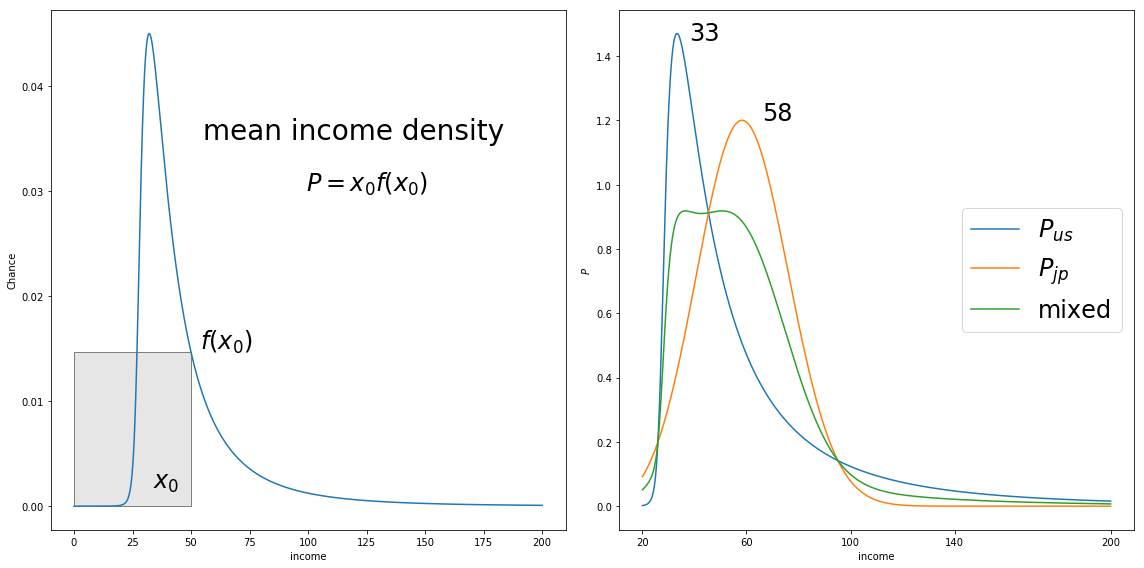

In [6]:
plt.figure(figsize=(16,8))
dist = scipy.stats.johnsonsu
ax=plt.subplot(1,2,1)
X = np.linspace(0,200, 2000)
pdf_fitted_us = dist.pdf(X, *param_us)
plt.plot(X, pdf_fitted_us)
b0=50
ix = np.linspace(0, b0)
iy = [dist.pdf(b0, *param_us)]*len(ix)
verts = [(0, 0)]+list(zip(ix, iy)) + [(b0, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(65, 0.015, r"$f(x_0)$",horizontalalignment='center', fontsize=24)
plt.text(45,0.0017, r"$x_0$",horizontalalignment='right', fontsize=24)
plt.text(55,0.035,'mean income density',horizontalalignment='left', fontsize=28)
plt.text(99,0.03,r'$P = x_0f(x_0)$',horizontalalignment='left', fontsize=24)
ax.set_xlabel('income')
ax.set_ylabel('Chance')

ax=plt.subplot(1,2,2)
#US data
X = np.linspace(20,200, 2000)
pdf_fitted_us = dist.pdf(X, *param_us)
y_us=np.multiply(X,pdf_fitted_us)
plt.plot(X, y_us, label='$P_{us}$')
plt.text(38,1.45,'33',fontsize=24)
# Japan data
pdf_fitted_jp = dist.pdf(X, *param_jp)
y_jp=np.multiply(X,pdf_fitted_jp)
plt.plot(X,y_jp, label='$P_{jp}$')
ax.set_xlabel('income')
ax.set_ylabel('$P$')
# mixed data 
eta=0.4532
y_mix=eta*y_us+(1.0-eta)*y_jp
plt.plot(X,y_mix, label='mixed')
plt.text(66,1.2,'58',fontsize=24)
plt.legend(loc='center right',fontsize=24)
ax.set_xticks([20,60,100,140,200])
plt.tight_layout()
print('Density is max in US when income is',np.argmax(y_us)*(200-20)/2000.0+20)
print('Density is maximum in japan when income is',np.argmax(y_jp)*(200-20)/2000+20)

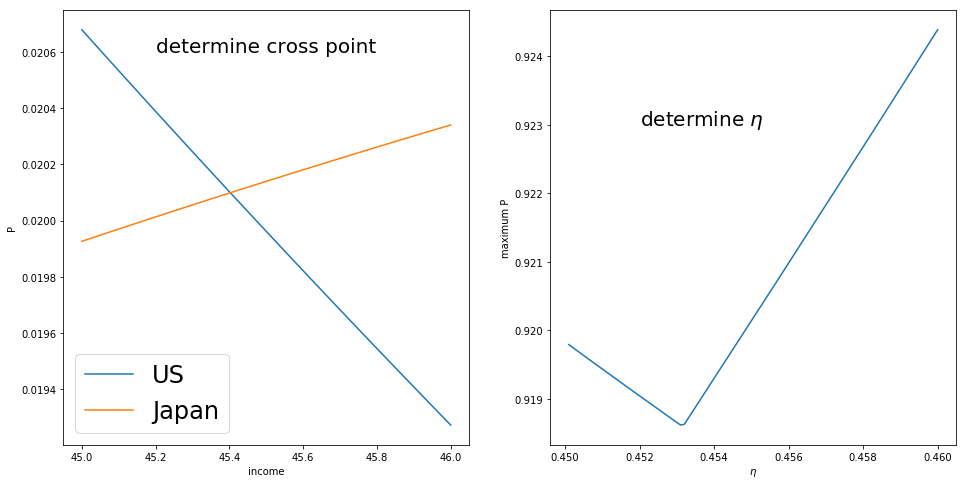

In [7]:

def mixed(eta):
    return eta*y_us+(1-eta)*y_jp

# How to determine the parameters for mixed P

plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
xshort = np.linspace(45,46,100)
pu = dist.pdf(xshort, *param_us)
pj = dist.pdf(xshort, *param_jp)
plt.plot(xshort, pu, label='US')
plt.plot(xshort, pj, label="Japan")
ax.set_xlabel('income')
ax.set_ylabel('P')
plt.text(45.2,0.0206,'determine cross point',fontsize=20)
plt.legend(loc='lower left',fontsize=24)

ax = plt.subplot(1,2,2)
eta=0.45
x1=[]
y1=[]
for i in range(100):
    eta+=0.0001
    x1.append(eta)
    y1.append(mixed(eta).max())
plt.plot(x1,y1)
ax.set_xlabel('$\eta$')
ax.set_ylabel('maximum P')
plt.text(0.452,0.923,r'determine $\eta$',fontsize=20)
plt.show()